In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Problem Statement
The sinking of the Titanic is one of the most infamous shipwrecks in history, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. For this notebook, I will be build a predictive model that answers the question: “what sorts of people were more likely to survive?” 

# Data
There are two datasets included with the kaggle competition, one dataset is titled train.csv and the other is titled test.csv. The datasets include passenger information like name, age, gender, socio-economic class, etc. Train.csv will contain the details of a subset of the passengers on board and whether the passengers survived or not. The test.csv dataset contains similar information but does not disclose the survived status for each passenger.

In [9]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Cleaning

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Feature Selection
Some features are more important thant the other, it is to the discretion of data scientist to determine what to keep and what to drop

In [70]:
select = ['Age', 'Survived', 'Pclass', 'Sex', 'Fare']
new_df = train_df[select]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Survived  891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Sex       891 non-null    object 
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


## Missing Values
Age column have some missing values. Lets fill it up with the average

In [31]:
print("precent of Age missing", (891-714)/891 )
age_mean = new_df['Age'].mean()
new_df = new_df.fillna(age_mean)
new_df.info()

precent of Age missing 0.19865319865319866
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Survived  891 non-null    int64  
 2   Pclass    891 non-null    int64  
 3   Sex       891 non-null    object 
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


## Column Type
lets take a look on sex object. I might need to factorize it depend on what the object is

In [32]:
print(type(new_df['Sex'][0]))
new_df['Sex'] = pd.factorize(new_df['Sex'])[0]
print("after factorize")
print(type(new_df['Sex'][1]))

<class 'str'>
after factorize
<class 'numpy.int64'>


# EDA

## kdeplot 
Is a good way to see the distribution of a variable. Since I fill the missing data in age with the average, it might have skew the distribution

<AxesSubplot:xlabel='Age', ylabel='Density'>

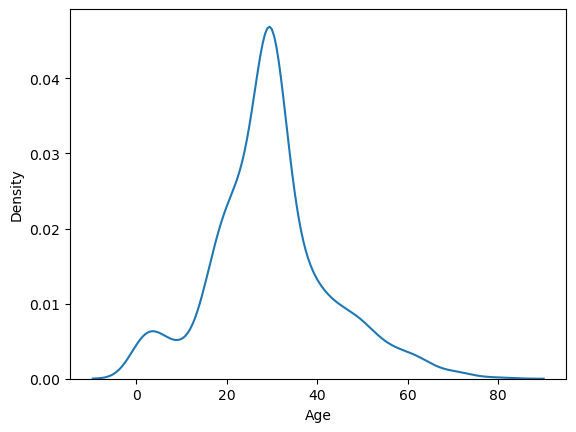

In [38]:
sns.kdeplot(data=new_df, x="Age")

## Histogram
Histogram is a good way compare the relative size within a category

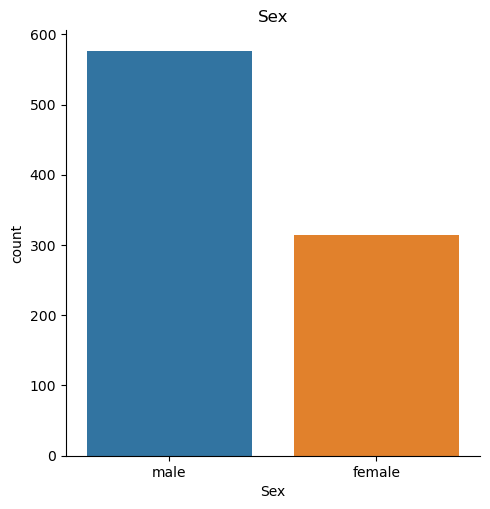

In [44]:
sns.catplot(x='Sex', data=train_df, kind='count').set(title='Sex')
plt.show()

## Correlation Matrix 
It is use to compare categories to see how similiar they are to each other

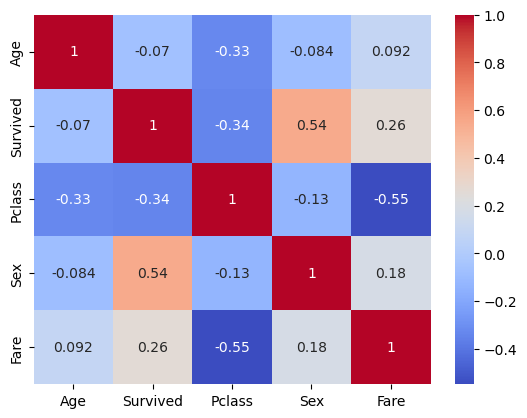

In [39]:
corr = new_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True);

# Models

Before starting the model, we need to separate training data further into training and validation

In [51]:
X = new_df[['Age', 'Pclass', 'Sex', 'Fare']]
y = new_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regression Model

In [65]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [66]:
accuracy_score(y_test, lr_pred)

0.7988826815642458

In [67]:
confusion_matrix(y_test, lr_pred)

array([[89, 16],
       [20, 54]])

## Random Forest Model

In [62]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [64]:
accuracy_score(y_test, clf_pred)

0.7486033519553073

In [63]:
confusion_matrix(y_test, clf_pred)

array([[92, 13],
       [32, 42]])

Logistic Regression seems to preform better than the random forest, so we will use the logistic regression model for the test set

In [76]:
test_select = ['Age', 'Pclass', 'Sex', 'Fare']
test_df[test_select].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   Pclass  418 non-null    int64  
 2   Sex     418 non-null    object 
 3   Fare    417 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


In [91]:
test_age_mean = test_df['Age'].mean()
test_df['Age'] = test_df['Age'].fillna(age_mean)
test_df['Sex'] = pd.factorize(test_df['Sex'])[0]
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
PID = test_df['PassengerId']
test = test_df[test_select]

In [92]:
test_pred = lr.predict(test)

In [93]:
submission = pd.DataFrame({
    "PassengerId": PID,
    "Survived": test_pred
})
submission.to_csv("submission.csv", index=False)

# Conclusion
For this notebook, we analyze the titanic dataset. First I select data that I think will help us predict the survival rate. Looking back, I should have used forward or backward selection to find the feature that I want to work with. Another possibility is to look at the correlation matrix heat map and select feature that have high correlation with survival. I also clean the data by get rid of missing values and factorized the sex variable. After the data is prepped, I created two models, compare their preformance by looking at their accuracy score and their confusion matrix. Once the model have been compared, I choose the better model for predicting the test data.

This is my first kaggle submission, I'm happy that it receive the score .76 score. 